In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_pickle('./data/raw/corpus.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23450 entries, 0 to 49
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   data         23450 non-null  object
 1   total_pages  23450 non-null  int64 
 2   message      9950 non-null   object
dtypes: int64(1), object(2)
memory usage: 732.8+ KB


In [47]:
pd.set_option('display.max_colwidth', None)

<AxesSubplot:>

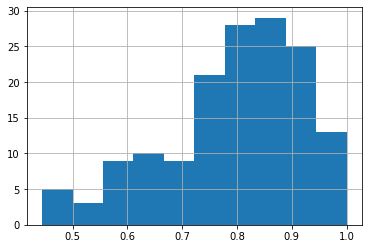

In [61]:
df_news = pd.read_pickle('./data/processed/chartdata_sent.pkl')
df_news['polarity'].hist()

In [273]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 152 entries, 2021-06-07 to 2021-11-05
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   blocks-size                       152 non-null    float64
 1   avg-block-size                    152 non-null    float64
 2   n-transactions-total              152 non-null    float64
 3   hash-rate                         152 non-null    float64
 4   difficulty                        152 non-null    float64
 5   transaction-fees-usd              152 non-null    float64
 6   n-unique-addresses                152 non-null    float64
 7   n-transactions                    152 non-null    float64
 8   my-wallet-n-users                 152 non-null    float64
 9   utxo-count                        152 non-null    float64
 10  n-transactions-excluding-popular  152 non-null    float64
 11  estimated-transaction-volume-usd  152 non-null    fl

In [272]:
df_news = pd.read_pickle('./data/processed/chartdata_sent.pkl')
df_news.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 152 entries, 2021-06-07 to 2021-11-05
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   blocks-size                       152 non-null    float64
 1   avg-block-size                    152 non-null    float64
 2   n-transactions-total              152 non-null    float64
 3   hash-rate                         152 non-null    float64
 4   difficulty                        152 non-null    float64
 5   transaction-fees-usd              152 non-null    float64
 6   n-unique-addresses                152 non-null    float64
 7   n-transactions                    152 non-null    float64
 8   my-wallet-n-users                 152 non-null    float64
 9   utxo-count                        152 non-null    float64
 10  n-transactions-excluding-popular  152 non-null    float64
 11  estimated-transaction-volume-usd  152 non-null    fl

In [271]:
df_news = pd.read_pickle('./data/processed/chartdata_sent.pkl')
df_news.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 152 entries, 2021-06-07 to 2021-11-05
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   blocks-size                       152 non-null    float64
 1   avg-block-size                    152 non-null    float64
 2   n-transactions-total              152 non-null    float64
 3   hash-rate                         152 non-null    float64
 4   difficulty                        152 non-null    float64
 5   transaction-fees-usd              152 non-null    float64
 6   n-unique-addresses                152 non-null    float64
 7   n-transactions                    152 non-null    float64
 8   my-wallet-n-users                 152 non-null    float64
 9   utxo-count                        152 non-null    float64
 10  n-transactions-excluding-popular  152 non-null    float64
 11  estimated-transaction-volume-usd  152 non-null    fl

In [274]:
df_chartdata = pd.read_pickle('./data/processed/chartdata.pkl')
df_chartdata['price'] = df_chartdata['market-price']
# df_chartdata.drop(['market-price'], axis=1, inplace=True)
# df_chartdata[['next-price']] = df_chartdata[['price']].shift(-1)
# df_chartdata.loc[(df_chartdata['price'] <= df_chartdata['next-price']), 'signal'] = 1
# df_chartdata.loc[(df_chartdata['price'] >= df_chartdata['next-price']), 'signal'] = 0
# df_chartdata.dropna(subset=['signal'], inplace=True)
# df_chartdata[['signal']] = df_chartdata[['signal']].astype(int)
# df_chartdata.drop(['next-price'], axis=1, inplace=True)
# df_chartdata.info()

In [66]:
df_chartdata['signal'].value_counts()

KeyError: 'signal'

In [67]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go




trace1 = go.Scatter(
            x=df_chartdata.index,
            y=df_chartdata['price'],
            mode='lines',
            name='Original Price'
            )
layout = dict(
                title='<b>Bitcoin Price</b>',
                yaxis=dict(title='<b>BTC Price (USD)</b>')
            )
pdata = [trace1]
fig = dict(data=pdata, layout=layout)
iplot(fig, filename="Time Series with Rangeslider")

In [330]:
df_chartdata = pd.read_pickle('./data/processed/chartdata_sent.pkl')
df_chartdata['price'] = df_chartdata['market-price']

In [277]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=df_chartdata.index, y=df_chartdata['price'], name="Bitcoin Price (USD)"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df_chartdata.index, y=df_chartdata['polarity'], name="News Sentiment", line = dict(color='firebrick', dash='dot')),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="<b>Bitcoin Price and Bitcoin News Sentiment</b>"
)

# Set x-axis title
fig.update_xaxes(title_text="<b>Date</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Bitcoin Price (USD)</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Bitcoin Sentiment</b>", secondary_y=True)

fig.show()

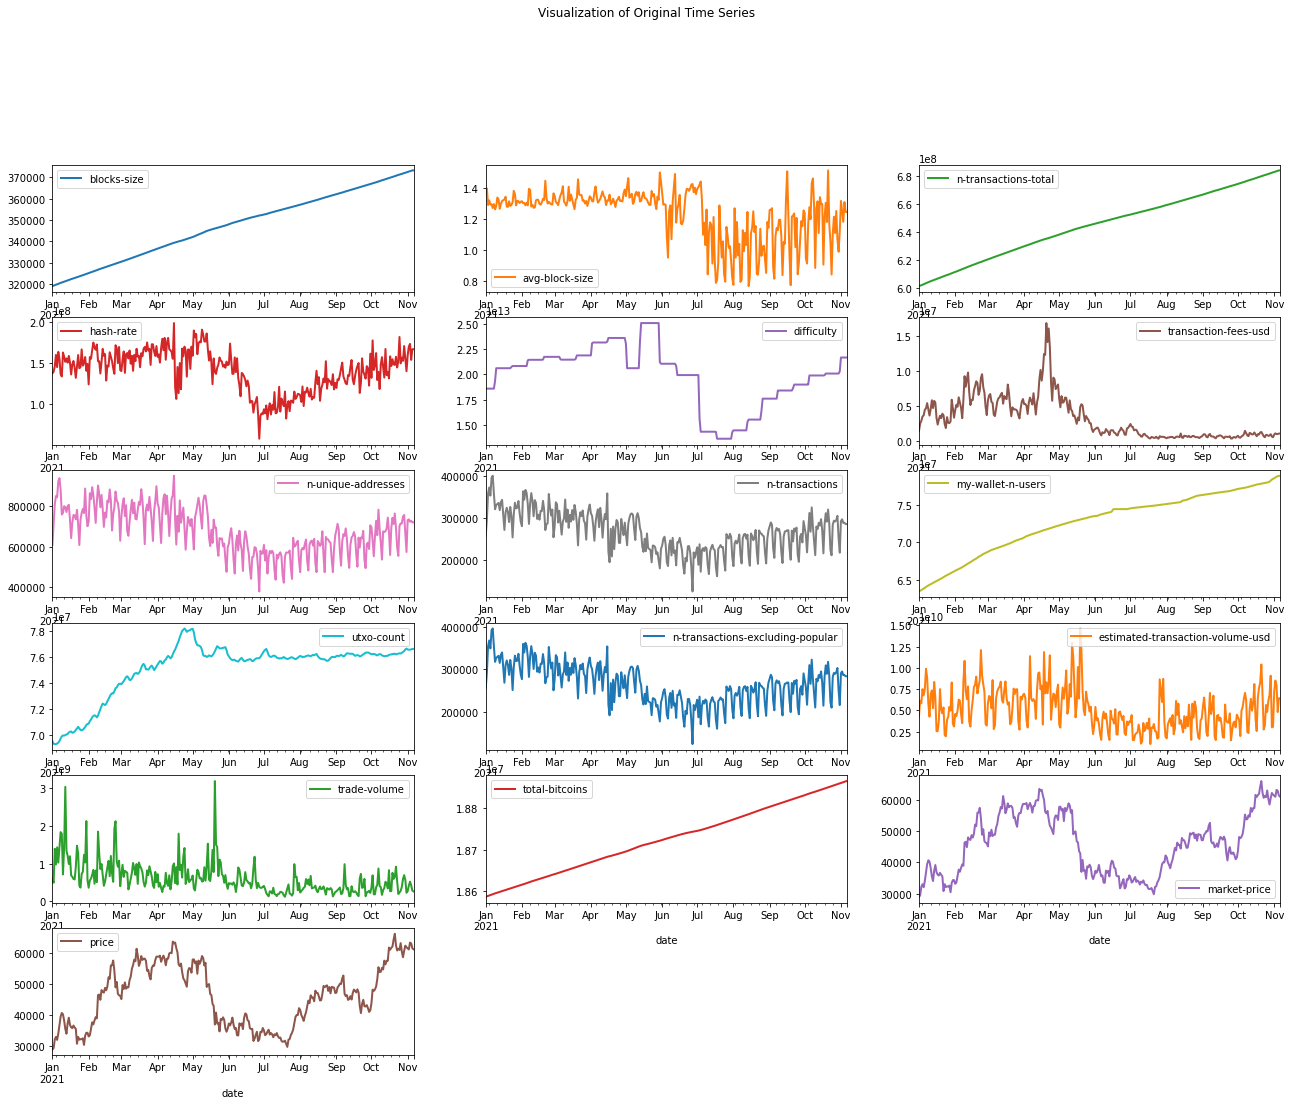

In [57]:
df_chartdata.plot(subplots=True,
        layout=(8, 3),
        figsize=(22,22),
        fontsize=10, 
        linewidth=2,
        sharex=False,
        title='Visualization of Original Time Series')
plt.show()

In [327]:
import plotly.express as px
fig = px.imshow(df_chartdata.corr(method="spearman"))
fig.update_layout(
    title='Correlation Heatmap (Spearman)',
    width=900,
    height=800,
)
fig.show()

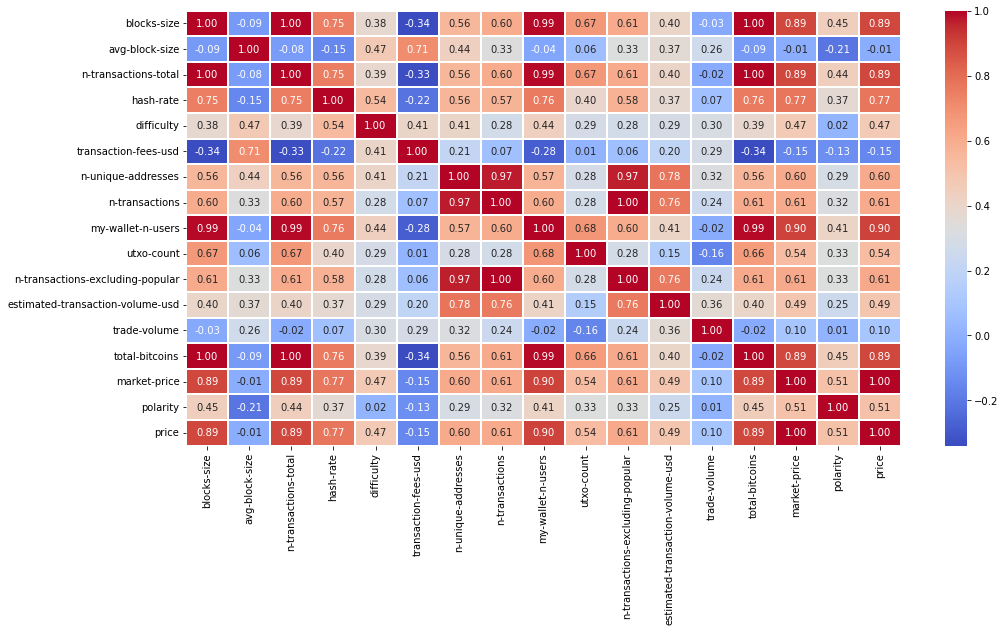

In [331]:
import seaborn as sns

corr_matrix = df_chartdata.corr()
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4,
            annot_kws={"size": 10}, cmap='coolwarm', ax=ax)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [58]:
df = pd.read_pickle('./data/processed/news_corpus_predict.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8901 entries, 2021-05-30 to 2021-10-16
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   datetime         8901 non-null   object
 1   news_url         8901 non-null   object
 2   title            8901 non-null   object
 3   text             8901 non-null   object
 4   source_name      8901 non-null   object
 5   sentiment        8901 non-null   object
 6   type             8901 non-null   object
 7   article_title    8901 non-null   object
 8   article_text     8901 non-null   object
 9   article_summary  8901 non-null   object
 10  polarity         8901 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 834.5+ KB


In [62]:
df_total = df_chartdata.merge(df[['date','polarity']], on="date", how="inner")
df_total.info()

KeyError: "['date'] not in index"

In [ ]:
df_total = df_chartdata.merge(df_news[data, on="date", how="inner")
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7090 entries, 0 to 7089
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   date                              7090 non-null   datetime64[ns]
 1   blocks-size                       6991 non-null   float64       
 2   avg-block-size                    6991 non-null   float64       
 3   n-transactions-total              6991 non-null   float64       
 4   hash-rate                         6991 non-null   float64       
 5   difficulty                        6991 non-null   float64       
 6   transaction-fees-usd              6991 non-null   float64       
 7   n-unique-addresses                6991 non-null   float64       
 8   n-transactions                    6991 non-null   float64       
 9   my-wallet-n-users                 7090 non-null   float64       
 10  utxo-count                        7090 non-null 

In [ ]:
df_news = pd.read_pickle('./data/news_corpus_final.pkl')
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8180 entries, 0 to 8179
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   datetime         8180 non-null   object        
 1   date             8180 non-null   datetime64[ns]
 2   news_url         8180 non-null   object        
 3   title            8180 non-null   object        
 4   text             8180 non-null   object        
 5   source_name      8180 non-null   object        
 6   sentiment        8180 non-null   object        
 7   type             8180 non-null   object        
 8   article_title    8180 non-null   object        
 9   article_text     8180 non-null   object        
 10  article_summary  8180 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 703.1+ KB


In [ ]:
sentiment_dict = {'Negative': 0, 'Neutral': 2, 'Positive': 1}
df = df_news
df['polarity'] = df.sentiment.map(sentiment_dict)
df.drop(df[df['polarity'] == 2].index, inplace=True)

In [ ]:
df1 = df.groupby(['date'])['polarity'].mean()
df_news1 = df1.reset_index('date')
df_news1.set_index('date', inplace=True)
df_news1.head()

,polarity
date,
2020-12-04,0.600000
2020-12-05,0.444444
2020-12-06,0.900000
2020-12-07,0.866667
2020-12-08,0.616667


In [ ]:
df_comb = df_chartdata.merge(df_news1, left_on='date', right_on='date')
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112 entries, 2021-01-01 to 2020-12-31
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   blocks-size                       111 non-null    float64
 1   avg-block-size                    111 non-null    float64
 2   n-transactions-total              111 non-null    float64
 3   hash-rate                         111 non-null    float64
 4   difficulty                        111 non-null    float64
 5   transaction-fees-usd              111 non-null    float64
 6   n-unique-addresses                111 non-null    float64
 7   n-transactions                    111 non-null    float64
 8   my-wallet-n-users                 112 non-null    float64
 9   utxo-count                        112 non-null    float64
 10  n-transactions-excluding-popular  111 non-null    float64
 11  estimated-transaction-volume-usd  111 non-null    fl

In [ ]:
df_comb.to_pickle("./data/chartdata-sent.pkl")

In [ ]:
df_comb_no_sent = df_comb
df_comb_no_sent.drop(['polarity'], axis=1, inplace=True)
df_comb_no_sent.to_pickle("./data/chartdata-no-sent.pkl")

In [ ]:
df_comb_no_sent.head()

,blocks-size,avg-block-size,n-transactions-total,hash-rate,difficulty,transaction-fees-usd,n-unique-addresses,n-transactions,my-wallet-n-users,utxo-count,n-transactions-excluding-popular,estimated-transaction-volume-usd,trade-volume,total-bitcoins,market-price
date,,,,,,,,,,,,,,,
2021-01-01,319114.048500,1.352233,601577750.0,1.377640e+08,1.859959e+13,1.455398e+06,609741.0,258080.0,6.347335e+07,6.950296e+07,255086.0,4.343208e+09,6.065241e+08,1.858723e+07,28982.56
2021-01-02,319315.580633,1.395637,601835959.0,1.396132e+08,1.859959e+13,2.504284e+06,711719.0,297111.0,6.355104e+07,6.930876e+07,293409.0,6.152237e+09,4.912580e+08,1.858817e+07,29393.75
2021-01-03,319526.405445,1.288694,602133929.0,1.460853e+08,1.859959e+13,2.893754e+06,812749.0,359116.0,6.364457e+07,6.928974e+07,355123.0,5.847743e+09,1.393907e+09,1.858911e+07,32195.46
2021-01-04,319729.832857,1.318806,602493027.0,1.599542e+08,1.859959e+13,3.516375e+06,851667.0,373734.0,6.374747e+07,6.928741e+07,368932.0,7.503148e+09,9.758314e+08,1.859013e+07,33000.78
2021-01-05,319957.982033,1.292713,602865747.0,1.451608e+08,1.859959e+13,3.677641e+06,845343.0,354091.0,6.385578e+07,6.932941e+07,349895.0,6.775408e+09,1.432013e+09,1.859119e+07,32035.03


In [ ]:
df_comb[df_comb.polarity <= .6].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2021-01-04 to 2021-04-21
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   blocks-size                       31 non-null     float64
 1   avg-block-size                    31 non-null     float64
 2   n-transactions-total              31 non-null     float64
 3   hash-rate                         31 non-null     float64
 4   difficulty                        31 non-null     float64
 5   transaction-fees-usd              31 non-null     float64
 6   n-unique-addresses                31 non-null     float64
 7   n-transactions                    31 non-null     float64
 8   my-wallet-n-users                 31 non-null     float64
 9   utxo-count                        31 non-null     float64
 10  n-transactions-excluding-popular  31 non-null     float64
 11  estimated-transaction-volume-usd  31 non-null     flo

In [60]:
df_news = pd.read_pickle('./data/processed/news_corpus_predict.pkl')
#df_news = df_news.groupby(["date"])["polarity"].mean()
df_news = df_news.reset_index("date")
df_news.set_index("date", inplace=True)
df_news.sort_index(inplace=True)
df_news.info()
#pd.date_range(start = '2021-05-01', end = '2021-10-01' ).difference(df_news.index)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8901 entries, 2021-05-30 to 2021-10-16
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   datetime         8901 non-null   object
 1   news_url         8901 non-null   object
 2   title            8901 non-null   object
 3   text             8901 non-null   object
 4   source_name      8901 non-null   object
 5   sentiment        8901 non-null   object
 6   type             8901 non-null   object
 7   article_title    8901 non-null   object
 8   article_text     8901 non-null   object
 9   article_summary  8901 non-null   object
 10  polarity         8901 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 834.5+ KB


In [321]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go




trace1 = go.Scatter(
            x=df_news.index,
            y=df_news['polarity'],
            mode='lines',
            name='polarity'
            )
layout = dict(
                title='<b>polarity</b>',
                yaxis=dict(title='<b>polarity</b>')
            )
pdata = [trace1]
fig = dict(data=pdata, layout=layout)
iplot(fig, filename="Time Series with Rangeslider")

In [ ]:
df_news = pd.read_pickle('./data/processed/chartdata_sent.pkl')
df_news.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139 entries, 2021-05-30 to 2021-10-15
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   blocks-size                       139 non-null    float64
 1   avg-block-size                    139 non-null    float64
 2   n-transactions-total              139 non-null    float64
 3   hash-rate                         139 non-null    float64
 4   difficulty                        139 non-null    float64
 5   transaction-fees-usd              139 non-null    float64
 6   n-unique-addresses                139 non-null    float64
 7   n-transactions                    139 non-null    float64
 8   my-wallet-n-users                 139 non-null    float64
 9   utxo-count                        139 non-null    float64
 10  n-transactions-excluding-popular  139 non-null    float64
 11  estimated-transaction-volume-usd  139 non-null    fl

In [7]:
df_news = pd.read_pickle('./data/raw/news_corpus_101521.pkl')
df_news.set_index("date", inplace=True)
df_news.sort_index(inplace=True)
pd.date_range(start = '2021-01-01', end = '2021-10-03' ).difference(df_news.index)

DatetimeIndex(['2021-01-01'], dtype='datetime64[ns]', freq=None)

In [52]:
df_news = pd.read_pickle('./data/raw/news_corpus_110521.pkl')
df_news.set_index("date", inplace=True)
df_news.sort_index(inplace=True)
pd.date_range(start = '2021-01-01', end = '2021-11-05' ).difference(df_news.index)
df_news.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23912 entries, 2021-01-02 to 2021-11-05
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   datetime         23912 non-null  object
 1   news_url         23912 non-null  object
 2   title            23912 non-null  object
 3   text             23912 non-null  object
 4   source_name      23912 non-null  object
 5   sentiment        23912 non-null  object
 6   type             23912 non-null  object
 7   article_title    23912 non-null  object
 8   article_text     23912 non-null  object
 9   article_summary  23912 non-null  object
dtypes: object(10)
memory usage: 2.0+ MB


In [28]:
df_news = pd.read_pickle('./data/raw/news_corpus_110521_7.pkl')
df_news.set_index("date", inplace=True)
df_news.sort_index(inplace=True)
pd.date_range(start = '2021-07-01', end = '2021-07-20' ).difference(df_news.index)
df_news.tail()
df_news.loc['2021-07-01':'2021-07-19'].tail()

,datetime,news_url,title,text,source_name,sentiment,type,article_title,article_text,article_summary
date,,,,,,,,,,
2021-07-19,"Mon, 19 Jul 2021 06:04:12 -0400",https://www.coindesk.com/anatomy-of-ransomware...,"Anatomy of Ransomware Attack: Chat Support, a ...",Blockchain analytics firm Elliptic tracks a sm...,Coindesk,Neutral,Article,"Anatomy of Ransomware Attack: Chat Support, a ...",Elliptic's research then shows the steps REvil...,Elliptic's research then shows the steps REvil...
2021-07-19,"Mon, 19 Jul 2021 06:26:19 -0400",https://www.cryptopolitan.com/bitcoin-price-an...,Bitcoin Price Analysis: BTC moved sideways ove...,TL;DR Breakdown BTC continues to move sideways...,Cryptopolitan,Negative,Article,Bitcoin Price Analysis: BTC moved sideways ove...,TL;DR Breakdown\n\nBTC continues to move sidew...,Bitcoin price analysis indicates bearish press...
2021-07-19,"Mon, 19 Jul 2021 06:32:03 -0400",https://cryptopotato.com/nearly-70-of-would-ho...,Nearly 70% of Would HODL Bitcoin if it Drops B...,More than 65% of survey participants said they...,CryptoPotato,Negative,Article,Nearly 70% Would HODL Bitcoin if it Drops Belo...,Nearly 70% of current bitcoin holders are prep...,Nearly 70% of current bitcoin holders are prep...
2021-07-19,"Mon, 19 Jul 2021 06:36:00 -0400",https://coinidol.com/bitcoin-31000-downtrend/,"Bitcoin Finds Support Above $31,000; Can It Re...",Bitcoin (BTC) price has been trading above $31...,Coin Idol,Neutral,Article,"Bitcoin Finds Support Above $31,000; Can It Re...","Jul 19, 2021 at 10:36 // News\n\nCoin Idol Aut...","Jul 19, 2021 at 10:36 // NewsCoin Idol AuthorB..."
2021-07-19,"Mon, 19 Jul 2021 05:43:35 -0400",https://www.forbes.com/sites/cryptoconfidentia...,"Bitcoin Slides Toward $30,000 | New Crypto Fun...",Bitcoin stalls as Binance faces more regulator...,Forbes,Negative,Article,"Bitcoin Slides Toward $30,000 | New Crypto Fun...",BITCOIN STALLS AS BINANCE FACES MORE REGULATOR...,BITCOIN STALLS AS BINANCE FACES MORE REGULATOR...


In [50]:
df_news = pd.read_pickle('./data/raw/news_corpus_110521.pkl')
df_news.set_index("date", inplace=True)
df_news.sort_index(inplace=True)
df_news_7 = pd.read_pickle('./data/raw/news_corpus_110521_7.pkl')
df_news_7.set_index("date", inplace=True)
df_news_7.sort_index(inplace=True)
#df_total = df_news.merge(df_news_7.loc['2021-07-01':'2021-07-19'], on="date", how="outer")
df_total = df_news.merge(df_news_7, how="outer")
df_total['date'] = pd.to_datetime(df_total['datetime'], format='%a, %d %b %Y %H:%M:%S %z', utc=True)
df_total['date'] = df_total['date'].dt.date.astype('datetime64') 
#df_total.set_index("date", inplace=True)
#df_total.sort_index(inplace=True)
#pd.date_range(start = '2021-01-01', end = '2021-11-05' ).difference(df_total.index)
#df_total.info()

df_total.to_pickle('./data/raw/news_corpus_110521.pkl')

In [262]:
df_results = pd.read_csv('./results/highest_results.csv')
df_results.head()

,Predicted Days,Time Steps,Model Type,Sentiment,MAPE,Study
0,1,5,CNN,No,0.043441,1210
1,1,5,CNN,Yes,0.044335,1211
2,1,5,LSTM,No,0.219255,1168
3,1,5,LSTM,Yes,0.110877,1217
4,1,10,CNN,No,0.111148,1200


<AxesSubplot:xlabel='MAPE', ylabel='Time Steps'>

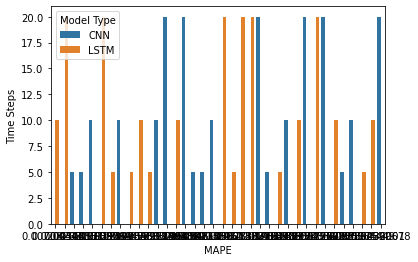

In [75]:

import seaborn as sns

sns.barplot(x="MAPE", y="Time Steps", hue="Model Type", data=df_results)



In [264]:
import plotly.express as px

#fig = px.bar(x = [1,5,10])
fig = px.scatter(df_results, x="Predicted Days", y="MAPE", color='Sentiment', symbol = "Model Type", symbol_sequence=['circle-open','square', 'square', 'square-open'], color_discrete_sequence = ['blue', 'orange', 'green', 'red'], log_y=True, width=800, height=1200)
fig.update_xaxes(type='category')
#fig.update_yaxes(dtick=0.05)
#fig.update_layout(yaxis_tickformat = "0.0000001r")
fig.update_traces(textposition='bottom right')
fig.update_traces(marker=dict(size=10),
                  selector=dict(mode='markers'))
#fig.update_yaxes(tick0=0, dtick=.25)
fig.show()

In [267]:
import plotly.express as px

#fig = px.bar(x = [1,5,10])
fig = px.scatter(df_results, x="Model Type", y="MAPE", color='Sentiment', log_y=True, facet_col="Predicted Days", height=800)
fig.update_xaxes(type='category')
#fig.update_yaxes(dtick=0.05)
#fig.update_layout(yaxis_tickformat = "0.0000001r")
fig.update_traces(textposition='bottom right')
fig.update_traces(marker=dict(size=8),
                  selector=dict(mode='markers'))
#fig.update_yaxes(tick0=0, dtick=.25)
fig.update_layout(
    title_text="<b>Highest Accuracy Models by Predicted Days</b>"
)

# Set x-axis title
fig.update_xaxes(title_text="<b>Model Type</b>",)

# Set y-axes titles
#fig.update_yaxes(title_text="<b>Mean Absolute Percentage Error (MAPE)</b>", secondary_y=False)
fig.show()

In [268]:
import plotly.express as px

#fig = px.bar(x = [1,5,10])
fig = px.scatter(df_results, x="Predicted Days", y="MAPE", color='Sentiment', log_y=True, facet_col="Time Steps", height=800)
fig.update_xaxes(type='category')
#fig.update_yaxes(dtick=0.05)
#fig.update_layout(yaxis_tickformat = "0.0000001r")
fig.update_traces(textposition='bottom right')
fig.update_traces(marker=dict(size=8),
                  selector=dict(mode='markers'))
#fig.update_yaxes(tick0=0, dtick=.25)
fig.update_layout(
    title_text="<b>Highest Accuracy Models by Time Steps</b>"
)

# Set x-axis title
#ig.update_xaxes(title_text="<b>Prediction Length</b>",)

# Set y-axes titles
#fig.update_yaxes(title_text="<b>Mean Absolute Percentage Error (MAPE)</b>", secondary_y=False)
fig.show()

In [202]:
fig = px.histogram(df_results, x="MAPE",facet_col="Time Steps")
fig.show()

In [269]:
import plotly.express as px

fig = px.scatter(df_results, x="Time Steps", y="MAPE", color='Sentiment', log_y=True, 
    symbol = "Model Type", symbol_sequence=['circle','diamond'], color_discrete_sequence = ['blue', 'orange'],
    facet_col="Predicted Days", height=800)
fig.update_xaxes(type='category')
#fig.update_yaxes(dtick=0.05)
#fig.update_layout(yaxis_tickformat = "0.0000001r")
fig.update_traces(textposition='bottom right')
fig.update_traces(marker=dict(size=10),
                  selector=dict(mode='markers'))
#fig.update_yaxes(tick0=0, dtick=.25)
fig.update_layout(
    title_text="<b>Highest Accuracy Models by Predicted Days (Log Scale)</b>"
)

# Set x-axis title
#ig.update_xaxes(title_text="<b>Prediction Length</b>",)

# Set y-axes titles
#fig.update_yaxes(title_text="<b>Mean Absolute Percentage Error (MAPE)</b>", secondary_y=False)
fig.show()

In [343]:
df_results_1 = pd.read_csv('./results/5_day_results.csv')
df_results_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Model Type  252 non-null    object 
 1   Time Steps  252 non-null    int64  
 2   Sentiment   252 non-null    object 
 3   Study       252 non-null    int64  
 4   MAPE        252 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 10.0+ KB


In [333]:
fig = px.histogram(df_results_1, x="MAPE",color="Time Steps")
fig.show()

In [337]:
df_results_5 = pd.read_csv('./results/5_day_results.csv')
fig = px.histogram(df_results_5, x="MAPE",color="Time Steps")
fig.show()

In [346]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

df_results_1 = pd.read_csv('./results/1_day_results.csv')
df_results_1['Predicted Days'] = 1
df_results_5 = pd.read_csv('./results/5_day_results.csv')
df_results_5['Predicted Days'] = 5
df_results_10 = pd.read_csv('./results/10_day_results.csv')
df_results_10['Predicted Days'] = 10
df_all_results = pd.concat([df_results_1, df_results_5, df_results_10])

fig = px.histogram(df_all_results, x="MAPE",color="Time Steps", facet_row="Predicted Days", facet_col="Model Type", height=900, barmode="group")
#fig.update_layout(xaxis_tickformat = "0.01r")
fig.update_layout(
    title_text="<b>Distribution of Accuracy by Model Type & Predicted Days</b>"
)
fig.show()

In [345]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

df_results_1 = pd.read_csv('./results/1_day_results.csv')
df_results_1['Predicted Days'] = 1
df_results_5 = pd.read_csv('./results/5_day_results.csv')
df_results_5['Predicted Days'] = 5
df_results_10 = pd.read_csv('./results/10_day_results.csv')
df_results_10['Predicted Days'] = 10
df_all_results = pd.concat([df_results_1, df_results_5, df_results_10])

fig = px.histogram(df_all_results, x="MAPE",color="Sentiment", facet_row="Predicted Days", facet_col="Time Steps", height=900, barmode="group",nbins=10)
#fig.update_layout(xaxis_tickformat = "0.01r")
fig.update_layout(
    title_text="<b>Distribution of Accuracy by Time Steps & Predicted Days</b>"
)
fig.show()

In [309]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

df_results_1 = pd.read_csv('./results/1_day_results.csv')
df_results_1['Predicted Days'] = 1
df_results_5 = pd.read_csv('./results/5_day_results.csv')
df_results_5['Predicted Days'] = 5
df_results_10 = pd.read_csv('./results/10_day_results.csv')
df_results_10['Predicted Days'] = 10
df_all_results = pd.concat([df_results_1, df_results_5, df_results_10])

fig = px.histogram(df_all_results, x="MAPE",color="Sentiment", facet_row="Predicted Days", height=900, barmode="group", nbins=40)
#fig.update_layout(xaxis_tickformat = "0.01r")
fig.update_layout(
    title_text="<b>Distribution of Accuracy by Time Steps & Predicted Days</b>"
)
fig.show()

In [317]:
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
np.random.seed(2)

x = np.random.randn(1000)
hist_data = [x]
group_labels = ['MAPE'] # name of the dataset

mean = np.mean(x)
stdev_pluss = np.std(x)
stdev_minus = np.std(x)*-1

fig = ff.create_distplot([df_all_results["MAPE"]], group_labels, curve_type='kde')
#fig.update_layout(template = 'plotly_dark')
fig.show()